In [16]:
import matplotlib.pyplot as plt
import note_seq
import bokeh
import librosa.display

from src.features.build_features import detokenize
from src.entities.audio_params import AudioParams
from src.entities.dataset_params import DatasetParams
from src.data.make_dataset import WavMidiDataset

SAMPLE_RATE = 44100
FRAME_LENGTH = 1000

audio_params = AudioParams(
    sample_rate=SAMPLE_RATE,
    frame_length=FRAME_LENGTH,
    frame_step=FRAME_LENGTH,
    frame_time=FRAME_LENGTH / SAMPLE_RATE,
    n_mels=128,
    fmin=8,
    fmax=12500,
    window="taylor"
)
dataset_params = DatasetParams(
    root_path="../data/raw/maestro-v3.0.0/",
    metadata="maestro-v3.0.0.csv",
    years_list=[2013, 2014],
    split="train",
    audio_params=audio_params,
)

dataset = WavMidiDataset(dataset_params)


In [17]:
frames, notes, times = dataset[0]
midi_filename, _ = dataset._data.iloc[0]
ns = note_seq.midi_file_to_note_sequence(dataset._root_path + midi_filename)

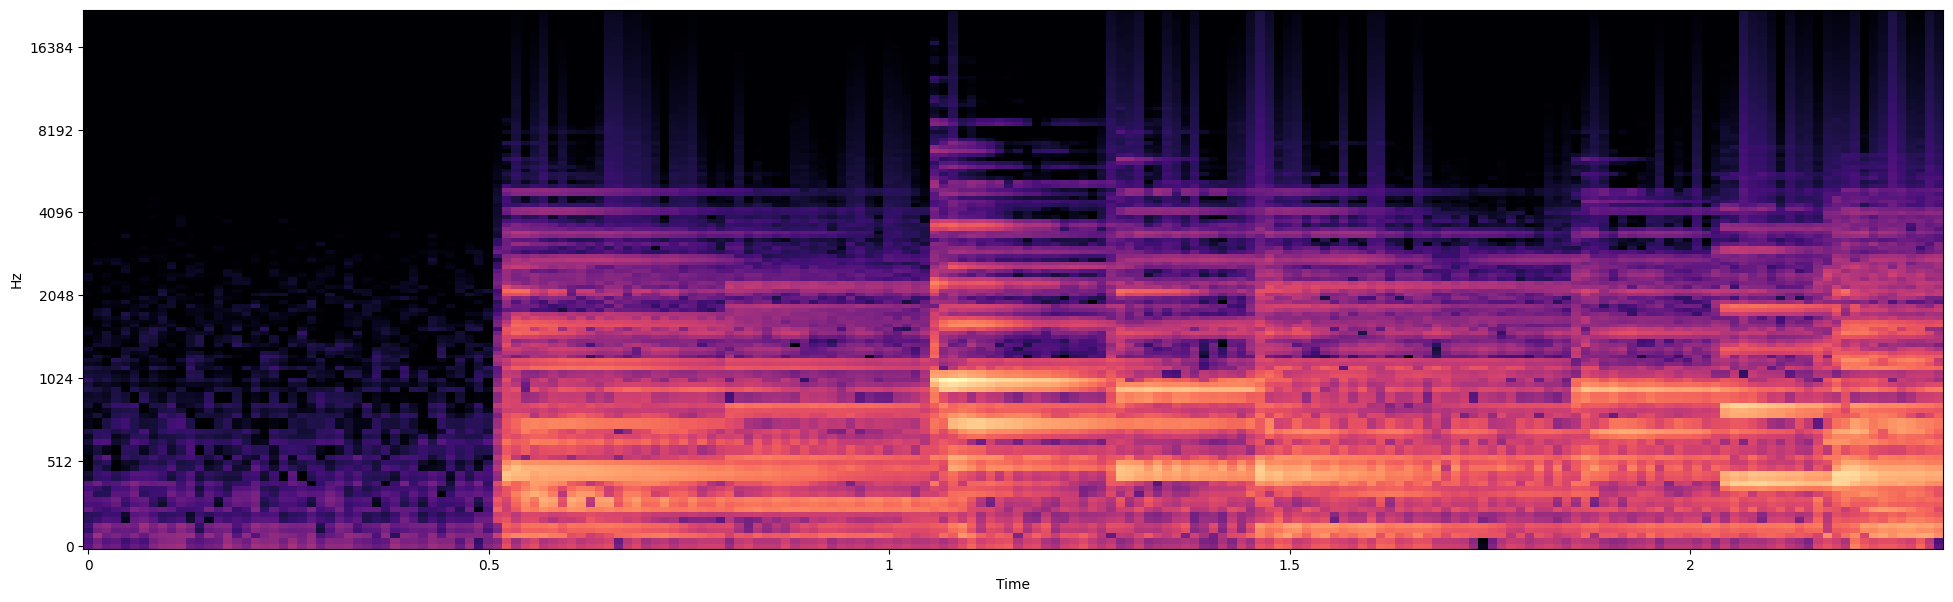

In [18]:
plt.figure(figsize=(24, 7))
librosa.display.specshow(frames[:, :200], sr=audio_params.sample_rate, x_axis='time',y_axis='mel')

In [4]:
frames.shape

(128, 24914)

In [5]:
len(notes)

24914

In [20]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
loss = nn.MultiLabelMarginLoss()
x = torch.FloatTensor([[0.1, 0.9, 0.1, 1]])
# for target y, only consider labels 3 and 0, not after label -1
y = torch.LongTensor([[1, 3, -1, -1]])
# 0.25 * ((1-(0.1-0.2)) + (1-(0.1-0.4)) + (1-(0.8-0.2)) + (1-(0.8-0.4)))
loss(x, y)

In [21]:
class AudioDataset(Dataset):
    def __init__(self, frames, notes) -> None:
        super().__init__()

        assert frames.shape[-1] == len(notes)

        self._frames = frames
        self._notes = notes
        self._len = len(notes)

    def __len__(self):
        return self._len

    def __getitem__(self, index):
        return self._frames[:, index], self._notes[index]

In [45]:
ds = AudioDataset(frames, notes)
dl = DataLoader(ds, 2)

frame, note = None, None
for i, batch in enumerate(dl):
    if i > 22:
        break
    frame, note = batch

frame.shape, len(note)

RuntimeError: each element in list of batch should be of equal size

In [6]:
fig = note_seq.plot_sequence(ns, False)
fig_proc = note_seq.plot_sequence(detokenize(notes, times, audio_params.frame_time), False)

fig.height = 500
fig_proc.height = 500
fig.width = 1500
fig_proc.width = 1500

bokeh.plotting.output_notebook()
bokeh.plotting.show(fig)
bokeh.plotting.show(fig_proc)

Loading BokehJS ...